In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets
cutlet=pd.read_csv('Cutlets.csv')


Problem Statements:
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.



In [2]:
 cutlet=pd.read_csv('Cutlets.csv')

In [3]:
cutlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [4]:
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
cutlet.columns

Index(['Unit A', 'Unit B'], dtype='object')

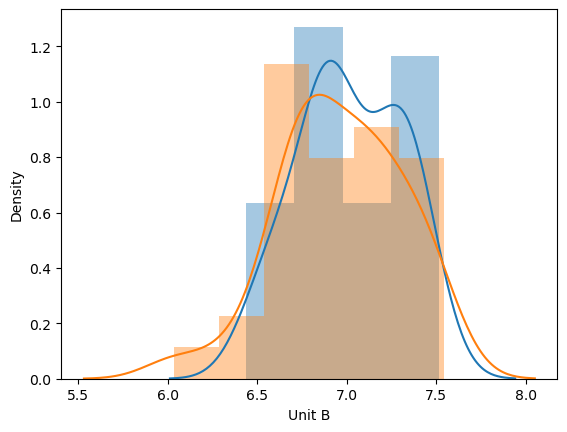

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(cutlet['Unit A'])
sns.distplot(cutlet['Unit B'])
plt.show()

In [7]:
#Null Hypothesis(H0): Unit A == Unit B  i.e,cutlet diameter is same
#Alternative Hypothesis(H1) : Unit A != Unit B  i.e, cutlet diameter are different

In [8]:
stats.ttest_ind(cutlet['Unit A'],cutlet['Unit B'])

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [9]:
#conclusion:
#where t(stastical) > t(critical) then we have to accept our alternative hypothesis
#therefore there was change in cutlet diameter

Problem Statements:A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [10]:
labtat=pd.read_csv('LabTAT.csv')
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [11]:
#Null Hypothesis(H0):Laboratory 1==Laboratory 2==Laboratory 3==Laboratory 4
#i.e,the average Turn Around Time (TAT) of reports of the laboratories is equal
#Alternative Hypothesis(H1):the average Turn Around Time (TAT) of reports of the laboratories
# atleast one average is different

In [12]:
stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [13]:
#conclusion:
# where f(stastical) > f(critical) then we have to accept our alternative hypothesis
#the average Turn Around Time (TAT) of reports of the laboratories atleast one average is different

Problem Statements:Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions



In [14]:
buyerRatio=pd.read_csv('BuyerRatio.csv')
buyerRatio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [15]:
buyerRatio_1=buyerRatio.iloc[:,1:]
buyerRatio_1

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [16]:
#Null Hypothesis(H0): East==West==North==South i.e,All proportions are equal
#Alternative Hypothesis: Atleast one proportion is different

In [17]:
Chisquares_results=scipy.stats.chi2_contingency(buyerRatio_1)
Chisquares_results


Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [18]:
Chi_square=[['','Test Statistic','p-value'],['Sample Data',Chisquares_results[0],Chisquares_results[1]]]
Chi_square

[['', 'Test Statistic', 'p-value'],
 ['Sample Data', 1.595945538661058, 0.6603094907091882]]

In [19]:
#conclusion:
# p value is 0.6603094907091882
# from above chi-square results we can say that  p-Value < alpha, we reject Null Hypothesis
# and we accept Alternative Hypothesis


Problem Statements:TeleCall uses 4 centers around the globe to process customer order forms.They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences



In [20]:
costomer=pd.read_csv('Costomer+OrderForm.csv')
costomer

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [21]:
from sklearn.preprocessing import LabelEncoder
costomer=costomer.apply(LabelEncoder().fit_transform)
costomer

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,0,1
298,1,1,1,1


In [22]:
#H0- % of defective not varies by centre
#H1- % of defective are varies by centre

In [23]:
# Using one way anova to carry the test on the hypothesis, that is made

In [24]:
stats.f_oneway(costomer.iloc[:,0],costomer.iloc[:,1],costomer.iloc[:,2],costomer.iloc[:,3])

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

In [25]:
#Conclusion:
# P value is 0.277, which is greater than 0.05, So we accept null hypothesis
# Thus, Percentage of defects does not vary with different centres